In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
consumer_key = "YLNvf86SD4ax201svZIY5x1RR"
consumer_secret = "ODjTIYzstASFaVZSvilvA1HVrPLFjl8vFEYcivmR3RjbSqdrEa"
access_token = "1146521681432842241-yqeE4HeIL0b78mFGlk6cYRHaSf5n4t"
access_token_secret = "ya76etXKILC6EAx02cPUkNdi1vayclZgZPgV2a140nXA2"

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "#skillibeng -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['@NICKIMINAJ when I tell you I love crocodile teeth remix with #SkilliBeng 🥰 such a vibe. https://t.co/wP0v6A3GuZ',
 ".@NICKIMINAJ on the Hot 50 this week (excluding the 5 Top 10's):\n\n#11, Chi-Raq (with @gherbo)\n#12, Crocodile Teeth… https://t.co/vfzh1xrWse",
 '@JamaicaObserver Congratulations #Skillibeng',
 '@khem6up ❌ #Skillibeng Dropped 🆕Music/🆕Video Called 🔊🔊”Bad Bitch”📢 Produced By #Keelykeyz  Directed By 🎥🎬 #Rxsh.hou… https://t.co/EkrZxZuaSN',
 '@khem6up ❌ #Skillibeng Dropped 🆕Music/🆕Video Called 🔊🔊”Bad Bitch”📢 Produced By #Keelykeyz  Directed By 🎥🎬 #Rxsh.hou… https://t.co/cFIZLpLOeA']

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['NICKIMINAJ when I tell you I love crocodile teeth remix with SkilliBeng such a vibe',
 'NICKIMINAJ on the Hot 50 this week excluding the 5 Top 10s11 ChiRaq with gherbo12 Crocodile Teeth',
 'JamaicaObserver Congratulations Skillibeng',
 'khem6up Skillibeng Dropped MusicVideo Called Bad Bitch Produced By Keelykeyz Directed By Rxshhou',
 'khem6up Skillibeng Dropped MusicVideo Called Bad Bitch Produced By Keelykeyz Directed By Rxshhou']

In [ ]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['nickiminaj',
 'when',
 'i',
 'tell',
 'you',
 'i',
 'love',
 'crocodile',
 'teeth',
 'remix',
 'with',
 'skillibeng',
 'such',
 'a',
 'vibe']

In [ ]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['nickiminaj',
  'when',
  'i',
  'tell',
  'you',
  'i',
  'love',
  'crocodile',
  'teeth',
  'remix',
  'with',
  'skillibeng',
  'such',
  'a',
  'vibe'],
 ['nickiminaj',
  'on',
  'the',
  'hot',
  '50',
  'this',
  'week',
  'excluding',
  'the',
  '5',
  'top',
  '10s11',
  'chiraq',
  'with',
  'gherbo12',
  'crocodile',
  'teeth']]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('skillibeng', 38),
 ('on', 12),
 ('the', 10),
 ('nickiminaj', 9),
 ('a', 9),
 ('by', 9),
 ('this', 7),
 ('for', 7),
 ('me', 7),
 ('crocodile', 6),
 ('remix', 6),
 ('x', 6),
 ('guide', 6),
 ('music', 6),
 ('video', 6)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,skillibeng,38
1,on,12
2,the,10
3,nickiminaj,9
4,a,9


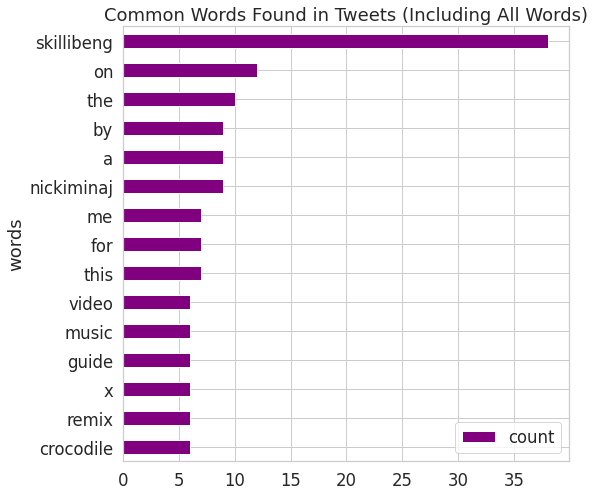

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

Removing Stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['a', 'through', 'my', 'some', 'off', 'until', 'we', 'i', "don't", 'whom']

In [ ]:
words_in_tweet[0]

['nickiminaj',
 'when',
 'i',
 'tell',
 'you',
 'i',
 'love',
 'crocodile',
 'teeth',
 'remix',
 'with',
 'skillibeng',
 'such',
 'a',
 'vibe']

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['nickiminaj',
 'tell',
 'love',
 'crocodile',
 'teeth',
 'remix',
 'skillibeng',
 'vibe']

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('skillibeng', 38),
 ('nickiminaj', 9),
 ('crocodile', 6),
 ('remix', 6),
 ('x', 6),
 ('guide', 6),
 ('music', 6),
 ('video', 6),
 ('teeth', 5),
 ('bad', 5),
 ('official', 5),
 ('crocodileteethremix', 5),
 ('bitch', 4),
 ('new', 4),
 ('via', 4)]

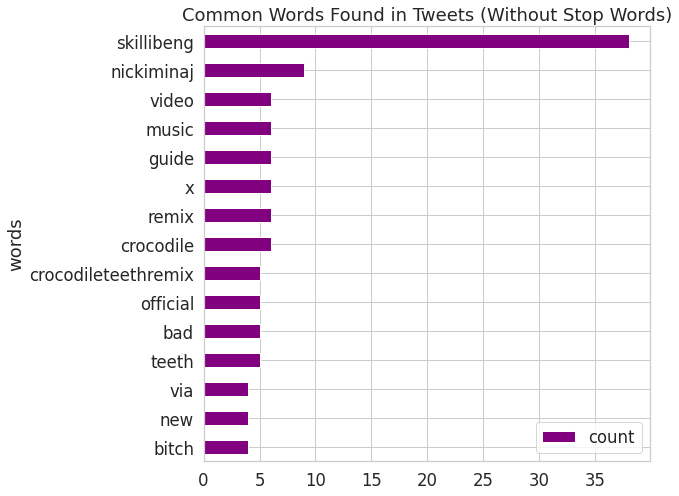

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

Removing Collection Words